In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 채점을 위해 numpy에서 임의성 도구들의 결과가 일정하게 나오도록 해준다
np.random.seed(5)
RATING_DATA_PATH = 'data/ratings.csv'

# numpy 출력 옵션 설정
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

In [9]:
def predict(Theta, X):
    """유저 취향과 상품 속성을 곱해서 예측 값을 계산하는 함수"""
    return Theta @ X


def cost(prediction, R):
    """행렬 인수분해 알고리즘의 손실을 계산해주는 함수"""
    return np.nansum((prediction - R) ** 2)


def initialize(R, num_features):
    """임의로 유저 취향과 상품 속성 행렬들을 만들어주는 함수"""
    num_users, num_items = R.shape # 유저 데이터 개수와 영화 개수를 변수에 저장

    Theta = np.random.rand(num_users, num_features)  # 유저 취향 행렬
    X = np.random.rand(num_features, num_items)  # 영화 속성 행렬

    return Theta, X


def gradient_descent(R, Theta, X, iteration, alpha, lambda_):
    """행렬 인수분해 경사 하강 함수"""
    num_user, num_items = R.shape
    num_features = len(X)
    costs = []

    for _ in range(iteration):
        prediction = predict(Theta, X)
        error = prediction - R
        costs.append(cost(prediction, R))

        for i in range(num_user):
            for j in range(num_items):
                if not np.isnan(R[i][j]):  # 실제 데이터가 없으면 건너뜀
                    for k in range(num_features):
                        # 유저 i에 대한 오차 * 영화 속성 + lambda_ * 정규화 전 Theta
                        # 유저 i에 대한 오차 * 영화 속성 = 유저 i에 대한 모든 오차와 영화 k에 대한 모든 속성의 곱의 모든 합
                        Theta[i][k] -= alpha * (np.nansum(error[i, :] * X[k, :]) + lambda_ * Theta[i][k])

                        # 영화 j에 대한 오차 * 유저 속성 + lambda_ * 정규화 전 X
                        X[k][j] -= alpha * (np.nansum(error[:, j] * Theta[:, k]) + lambda_ * X[k][j])

    return Theta, X, costs

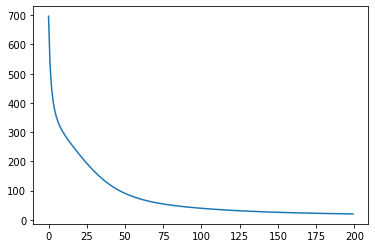

In [10]:
ratings_df = pd.read_csv(RATING_DATA_PATH, index_col='user_id')

for row in ratings_df.values:
    row -= np.nanmean(row)

R = ratings_df.values

Theta, X = initialize(R, 5)
Theta, X, costs = gradient_descent(R, Theta, X, 200, 0.001, 0.01)

plt.plot(costs)  # 디버깅

In [11]:
Theta, X

(array([[-0.35,  1.56,  0.31, -0.21, -0.26],
        [ 0.92,  0.21,  0.36,  0.56,  0.99],
        [ 0.48,  0.55, -0.19,  0.06,  1.71],
        [-0.64,  1.03,  0.35, -0.32,  0.13],
        [-0.39, -0.68,  0.44,  0.05,  1.05],
        [ 0.07, -0.64,  0.92,  1.23, -0.58],
        [ 0.33,  0.93, -1.21,  2.09,  0.27],
        [ 0.79, -0.48,  1.12,  0.05,  0.46],
        [ 1.06, -0.68, -0.28,  0.18, -1.12],
        [ 0.39,  0.63,  0.14,  0.98,  0.1 ],
        [ 1.47,  0.62, -0.91, -0.29, -0.35],
        [-1.56,  0.77,  0.83,  1.1 ,  0.13],
        [-0.89,  0.47,  0.47, -0.25,  0.81],
        [ 0.86, -0.13, -1.01,  0.2 ,  0.76],
        [-0.53, -1.14, -0.47,  0.08, -0.72],
        [-0.27, -0.07,  0.41,  0.49,  1.5 ],
        [ 0.17, -0.01,  0.07, -1.66,  0.27],
        [ 1.32,  0.88,  0.83,  0.72, -1.09],
        [-0.17, -1.68,  1.86, -0.16, -0.26],
        [-0.88, -0.53, -1.33,  0.14,  0.19]]),
 array([[ 0.12,  0.48, -2.18, -0.67, -1.05,  0.41,  0.03, -0.37, -0.86,
          0.44, -0.71,  1.